In [2]:
### Exemplo de Arquivo original (raw, sem transformações) - camada  bronze - 100 registros com 35 repetidos
import pandas as pd

df_bronze = pd.read_csv('registros-rede-vendas-xpto.csv')
print(df_bronze.info())
df_bronze.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Timestamp do Registro     74 non-null     object
 1   Nome                      74 non-null     object
 2   Sobrenome                 74 non-null     object
 3   Email                     74 non-null     object
 4   Telefone                  74 non-null     int64 
 5   Produto Adquirido         74 non-null     object
 6   Valor da Compra           74 non-null     int64 
 7   Canal                     74 non-null     object
 8   Plataforma de Interação   74 non-null     object
 9   Campanha de Marketing     74 non-null     object
 10  Vendedor                  32 non-null     object
 11  Desconto Oferecido        74 non-null     object
 12  Código de Desconto Usado  68 non-null     object
dtypes: int64(2), object(11)
memory usage: 7.6+ KB
None


,Timestamp do Registro,Nome,Sobrenome,Email,Telefone,Produto Adquirido,Valor da Compra,Canal,Plataforma de Interação,Campanha de Marketing,Vendedor,Desconto Oferecido,Código de Desconto Usado
0,2014-05-01 08:10:00,João,Silva,joao1@email.com,11987654321,Smartphone,2500,Anúncio Online,Aplicativo Móvel,Campanha Verão 2023,NaN,5%,VERAO2023
1,2014-06-10 09:15:00,Maria,Pereira,maria2@email.com,11998765432,Notebook,3500,Loja Física,Loja Física,Campanha Inverno 2023,Roberta,10%,INVERNO23
2,2014-07-11 10:20:00,Pedro,Alves,pedro3@email.com,11976543210,Tablet,1200,E-mail Marketing,Website,Campanha Outono 2023,NaN,0%,NaN
3,2014-05-15 10:30:00,Ana,Souza,ana4@email.com,11965432109,Smart TV,4000,Redes Sociais,Aplicativo Móvel,Campanha Primavera 2023,NaN,15%,PRIMAVERA23
4,2014-08-10 11:00:00,Bruno,Rocha,bruno5@email.com,11954321098,Headphone,500,Loja Física,Loja Física,Campanha Verão 2023,Renata,5%,VERAO2023
5,2018-06-15 11:45:00,Camila,Costa,camila6@email.com,11943210987,Smartwatch,800,Redes Sociais,Aplicativo Móvel,Campanha Inverno 2023,NaN,10%,INVERNO23
6,2018-07-20 12:30:00,Diego,Cardoso,diego7@email.com,11932109876,Mouse,50,E-mail Marketing,Website,Campanha Outono 2023,NaN,0%,NaN
7,2018-08-25 01:00:00,Elisa,Barros,elisa8@email.com,11921098765,Teclado,100,Loja Física,Loja Física,Campanha Primavera 2023,Juliana,5%,PRIMAVERA23
8,2018-05-30 02:30:00,Fábio,Machado,fabio9@email.com,11910987654,Monitor,900,Redes Sociais,Website,Campanha Verão 2023,NaN,15%,VERAO2023
9,2018-06-05 02:45:00,Gabriela,Ribeiro,gabi10@email.com,11909876543,Caixa de Som,350,Loja Física,Loja Física,Campanha Inverno 2023,Carlos,10%,INVERNO23


#### Nota-se que quase todas as colunas são do tipo object. Colunas Timestamp do Registro , Valor da Compra , Desconto Oferecido precisam ser convertidas para os tipos corretos 

In [4]:
# Checando quais colunas possuem valores NULL
df_bronze.isnull().sum()

Timestamp do Registro        0
Nome                         0
Sobrenome                    0
Email                        0
Telefone                     0
Produto Adquirido            0
Valor da Compra              0
Canal                        0
Plataforma de Interação      0
Campanha de Marketing        0
Vendedor                    42
Desconto Oferecido           0
Código de Desconto Usado     6
dtype: int64

In [1]:


### Código da lambda - ações que a lambda executa após ser disparada

import json
import boto3
from datetime import datetime
import os


### Exemplo evento do s3 - É assim que os dados chegam após o disparo da lambda
s3_event={'Records': [{'eventVersion': '2.0', 'eventSource': 'aws:s3', 'awsRegion': 'us-east-1', 'eventTime': '1970-01-01T00:00:00.000Z', 'eventName': 'ObjectCreated:Put', 'userIdentity': {'principalId': 'EXAMPLE'}, 'requestParameters': {'sourceIPAddress': '127.0.0.1'}, 'responseElements': {'x-amz-request-id': 'EXAMPLE123456789', 'x-amz-id-2': 'EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH'}, 's3': {'s3SchemaVersion': '1.0', 'configurationId': 'testConfigRule', 'bucket': {'name': 'start-bucket-project', 'ownerIdentity': {'principalId': 'EXAMPLE'}, 'arn': 'arn:aws:s3:::example-bucket'}, 'object': {'key': 'registros-rede-vendas-xpto.csv', 'size': 1024, 'eTag': '0123456789abcdef0123456789abcdef', 'sequencer': '0A1B2C3D4E5F678901'}}}]}
print(s3_event)

{'Records': [{'eventVersion': '2.0', 'eventSource': 'aws:s3', 'awsRegion': 'us-east-1', 'eventTime': '1970-01-01T00:00:00.000Z', 'eventName': 'ObjectCreated:Put', 'userIdentity': {'principalId': 'EXAMPLE'}, 'requestParameters': {'sourceIPAddress': '127.0.0.1'}, 'responseElements': {'x-amz-request-id': 'EXAMPLE123456789', 'x-amz-id-2': 'EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH'}, 's3': {'s3SchemaVersion': '1.0', 'configurationId': 'testConfigRule', 'bucket': {'name': 'start-bucket-project', 'ownerIdentity': {'principalId': 'EXAMPLE'}, 'arn': 'arn:aws:s3:::example-bucket'}, 'object': {'key': 'registros-rede-vendas-xpto.csv', 'size': 1024, 'eTag': '0123456789abcdef0123456789abcdef', 'sequencer': '0A1B2C3D4E5F678901'}}}]}


In [2]:
# Imprimir a estrutura do evento recebido estruturado como um json
print(json.dumps(s3_event)) # json.dumps usado apenas para estruturar o evento para print no cloudwatch, para ficar mais legível

'''
{
  "Records": [
    {
      "eventVersion": "2.0",
      "eventSource": "aws:s3",
      "awsRegion": "us-east-1",
      "eventTime": "1970-01-01T00:00:00.000Z",
      "eventName": "ObjectCreated:Put",
      "userIdentity": {
        "principalId": "EXAMPLE"
      },
      "requestParameters": {
        "sourceIPAddress": "127.0.0.1"
      },
      "responseElements": {
        "x-amz-request-id": "EXAMPLE123456789",
        "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH"
      },
      "s3": {
        "s3SchemaVersion": "1.0",
        "configurationId": "testConfigRule",
        "bucket": {
          "name": "start-bucket-project",
          "ownerIdentity": {
            "principalId": "EXAMPLE"
          },
          "arn": "arn:aws:s3:::example-bucket"
        },
        "object": {
          "key": "registros-rede-vendas-xpto.csv",
          "size": 1024,
          "eTag": "0123456789abcdef0123456789abcdef",
          "sequencer": "0A1B2C3D4E5F678901"
        }
      }
    }
  ]
}
'''

{"Records": [{"eventVersion": "2.0", "eventSource": "aws:s3", "awsRegion": "us-east-1", "eventTime": "1970-01-01T00:00:00.000Z", "eventName": "ObjectCreated:Put", "userIdentity": {"principalId": "EXAMPLE"}, "requestParameters": {"sourceIPAddress": "127.0.0.1"}, "responseElements": {"x-amz-request-id": "EXAMPLE123456789", "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH"}, "s3": {"s3SchemaVersion": "1.0", "configurationId": "testConfigRule", "bucket": {"name": "start-bucket-project", "ownerIdentity": {"principalId": "EXAMPLE"}, "arn": "arn:aws:s3:::example-bucket"}, "object": {"key": "registros-rede-vendas-xpto.csv", "size": 1024, "eTag": "0123456789abcdef0123456789abcdef", "sequencer": "0A1B2C3D4E5F678901"}}}]}


'\n{\n  "Records": [\n    {\n      "eventVersion": "2.0",\n      "eventSource": "aws:s3",\n      "awsRegion": "us-east-1",\n      "eventTime": "1970-01-01T00:00:00.000Z",\n      "eventName": "ObjectCreated:Put",\n      "userIdentity": {\n        "principalId": "EXAMPLE"\n      },\n      "requestParameters": {\n        "sourceIPAddress": "127.0.0.1"\n      },\n      "responseElements": {\n        "x-amz-request-id": "EXAMPLE123456789",\n        "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH"\n      },\n      "s3": {\n        "s3SchemaVersion": "1.0",\n        "configurationId": "testConfigRule",\n        "bucket": {\n          "name": "start-bucket-project",\n          "ownerIdentity": {\n            "principalId": "EXAMPLE"\n          },\n          "arn": "arn:aws:s3:::example-bucket"\n        },\n        "object": {\n          "key": "registros-rede-vendas-xpto.csv",\n          "size": 1024,\n          "eTag": "0123456789abcdef0123456789abcdef",\n     

In [3]:
# Simulando os valores das variáveis de ambiente da lambda - Hardcoded
datalake_bucket = 'datalake-project-aws'
datalake_layer = 'bronze'
glue_job_name = 'datalake-job-1'


## Navegando pelo JSON do evento do S3
![Navegando pelo JSON do evento do S3](json-evento-lambda.png "Navegando pelo JSON do evento do S3")


In [4]:
s3_event['Records'][0]

{'eventVersion': '2.0',
 'eventSource': 'aws:s3',
 'awsRegion': 'us-east-1',
 'eventTime': '1970-01-01T00:00:00.000Z',
 'eventName': 'ObjectCreated:Put',
 'userIdentity': {'principalId': 'EXAMPLE'},
 'requestParameters': {'sourceIPAddress': '127.0.0.1'},
 'responseElements': {'x-amz-request-id': 'EXAMPLE123456789',
  'x-amz-id-2': 'EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH'},
 's3': {'s3SchemaVersion': '1.0',
  'configurationId': 'testConfigRule',
  'bucket': {'name': 'start-bucket-project',
   'ownerIdentity': {'principalId': 'EXAMPLE'},
   'arn': 'arn:aws:s3:::example-bucket'},
  'object': {'key': 'registros-rede-vendas-xpto.csv',
   'size': 1024,
   'eTag': '0123456789abcdef0123456789abcdef',
   'sequencer': '0A1B2C3D4E5F678901'}}}

In [5]:
s3_event['Records'][0]['s3']

{'s3SchemaVersion': '1.0',
 'configurationId': 'testConfigRule',
 'bucket': {'name': 'start-bucket-project',
  'ownerIdentity': {'principalId': 'EXAMPLE'},
  'arn': 'arn:aws:s3:::example-bucket'},
 'object': {'key': 'registros-rede-vendas-xpto.csv',
  'size': 1024,
  'eTag': '0123456789abcdef0123456789abcdef',
  'sequencer': '0A1B2C3D4E5F678901'}}

In [6]:
s3_event['Records'][0]['s3']['bucket']

{'name': 'start-bucket-project',
 'ownerIdentity': {'principalId': 'EXAMPLE'},
 'arn': 'arn:aws:s3:::example-bucket'}

In [7]:
s3_event['Records'][0]['s3']['bucket']['name']

'start-bucket-project'

In [8]:
s3_event['Records'][0]['s3']['object']

{'key': 'registros-rede-vendas-xpto.csv',
 'size': 1024,
 'eTag': '0123456789abcdef0123456789abcdef',
 'sequencer': '0A1B2C3D4E5F678901'}

In [9]:
s3_event['Records'][0]['s3']['object']['key']

'registros-rede-vendas-xpto.csv'

In [10]:
# Obter informações do evento S3
## Obter nome do bucket de origem (bucket_name) através do evento do s3
## Obter nome do arquivo a ser processado (original_key) através do evento do s3
bucket_name = s3_event['Records'][0]['s3']['bucket']['name']
# original_key = event['Records'][0]['s3']['object']['key']
original_key = s3_event['Records'][0]['s3']['object']['key']
    
print("Bucket:", bucket_name)
print("Key original:", original_key)

Bucket: start-bucket-project
Key original: registros-rede-vendas-xpto.csv


In [11]:
# Configurar o novo nome do arquivo com a timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S') # Localmente o código identifica a hora da máquina local, diferente da AWS que usa horário UTC.
new_key = f"{timestamp}_{original_key}"  # novo nome, para renomear o arquivo no bucket de origem
final_key = f"{datalake_layer}/{new_key}"  # Caminho final do arquivo, para o bucket de destino

print(f'timestamp: {timestamp}')
print(f'new_key: {new_key}')
print(f'final_key: {final_key}')


timestamp: 20231109_172309
new_key: 20231109_172309_registros-rede-vendas-xpto.csv
final_key: bronze/20231109_172309_registros-rede-vendas-xpto.csv


### Movendo o arquivo do bucket de origem para a camada bronze


Não existe 'mover' propriamente dito. A Lambda deve simular um 'mover' de arquivo fazendo :


1 - Copiar o arquivo para o destino


2 - Deletar o arquivo da origem

In [12]:
# RENOMEANDO - é a simulação de um rename, ao criar uma cópia com novo nome desejado e então depois deletar o arquivo original

## 1 - Criar cópia com o nome desejado
## O método copy_object é usado para criar uma cópia do objeto de nome antigo (key) para o um novo objeto com o novo nome (new_key), no mesmo bucket
# s3_client.copy_object(Bucket=bucket_name, CopySource={'Bucket': bucket_name, 'Key': original_key}, Key=new_key) # Não rodalocalmente, sem conectar com a aws via credenciais

## 2 - Deletando o arquivo original
## Deletando o objeto com nome antigo com o método delete_object
#s3_client.delete_object(Bucket=bucket_name, Key=original_key) # Não roda localmente, sem conectar com a aws via credenciais



# MOVENDO - Copiar arquivo renomeado para o destino, definindo na final_key o caminho para onde o arquivo deve ser copiado

## 1 - Criar cópia do renomeado para o caminho desejado (final_key)
## criando uma cópia do arquivo renomeado (new_key) para o destino (final_key)
#s3_client.copy_object(Bucket=datalake_bucket, CopySource={'Bucket': bucket_name, 'Key': new_key}, Key=final_key) # Não roda localmente, sem conectar com a aws via credenciais

## 2 - Deletar o arquivo renomeado no bucket de origem (new_key)
# s3_client.delete_object(Bucket=bucket_name, Key=new_key) # Não roda localmente, sem conectar com a aws via credenciais
print(f'arquivo original : {original_key}')
print(f'arquivo renomeado : {new_key}')
print(f'arquivo renomeado no destino desejado : {final_key}')

arquivo original : registros-rede-vendas-xpto.csv
arquivo renomeado : 20231109_172309_registros-rede-vendas-xpto.csv
arquivo renomeado no destino desejado : bronze/20231109_172309_registros-rede-vendas-xpto.csv


In [13]:
# Salvando apenas o nome do arquivo para a passar para o glue job, sem extensao
# rsplit começa a divisao pelo fim da string
# rsplit dividirá pelo ponto, 1 vez, e pega o [0], primeiro elemento, que é o nome do arquivo sem a extensão
file_name = new_key.rsplit('.', 1)[0] 
print(file_name)

20231109_172309_registros-rede-vendas-xpto


In [14]:

## Iniciar o primeiro glue job do datalake, pelo método start_job_run e a variável de ambiente da lambda
## o método start_job_run vai iniciar o job definido pela variável glue_job_name, que o valor é definido na variável de ambiente da lambda
# response = glue_client.start_job_run(JobName=glue_job_name) # Não roda localmente, sem conectar com a aws via credenciais
print(f'Nome do glue job que será disparado no final da lambda : {glue_job_name}')

Nome do glue job que será disparado no final da lambda : datalake-job-1


In [4]:
# Exemplo de dados na camada SILVER - pós primeira transformação do datalake
# uma partição do arquivo total - partição do ano 2023
#!pip install pandas
#!pip install pyarrow

import pandas as pd
df_silver = pd.read_parquet('silver_sample.parquet')
print(df_silver.info())
df_silver.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp do Registro     32 non-null     datetime64[ns]
 1   Nome                      32 non-null     object        
 2   Sobrenome                 32 non-null     object        
 3   Email                     32 non-null     object        
 4   Telefone                  32 non-null     object        
 5   Produto Adquirido         32 non-null     object        
 6   Valor da Compra           32 non-null     float32       
 7   Canal                     32 non-null     object        
 8   Plataforma de Interação   32 non-null     object        
 9   Campanha de Marketing     32 non-null     object        
 10  Vendedor                  32 non-null     object        
 11  Desconto Oferecido        32 non-null     float64       
 12  Código de Desconto Usado

,Timestamp do Registro,Nome,Sobrenome,Email,Telefone,Produto Adquirido,Valor da Compra,Canal,Plataforma de Interação,Campanha de Marketing,Vendedor,Desconto Oferecido,Código de Desconto Usado,Arquivo de Origem
0,2023-09-16 13:25:00,Bruno,Moreira,bruno4@email.com,13565432108,Smartwatch,700.0,Redes Sociais,Aplicativo Móvel,Campanha Outono 2023,NÃO INFORMADO,0.10,OUTONO23,20231109_214340_registros
1,2023-10-08 17:50:00,Daniel,Gomes,daniel8@email.com,13521098764,Drone,1500.0,Loja Física,Loja Física,Campanha Inverno 2023,Patrícia,0.05,INVERNO23,20231109_214340_registros
2,2023-10-13 18:55:00,Aline,Rodrigues,aline9@email.com,13510987653,Geladeira,3500.0,Redes Sociais,Website,Campanha Inverno 2023,NÃO INFORMADO,0.10,INVERNO23,20231109_214340_registros
3,2023-10-24 20:15:00,Tatiana,Lopes,tatiana11@email.com,13508765431,Fritadeira Elétrica,600.0,Anúncio Online,Aplicativo Móvel,Campanha Inverno 2023,NÃO INFORMADO,0.10,INVERNO23,20231109_214340_registros
4,2023-09-07 11:15:00,Matheus,Silva,matheus2@email.com,13598765431,Headset,300.0,Loja Física,Loja Física,Campanha Outono 2023,Lucia,0.05,OUTONO23,20231109_214340_registros
5,2023-11-12 11:10:00,Guilherme,Barros,guilherme2@email.com,14523456789,Soundbar,550.0,Loja Física,Loja Física,Campanha Verão 2023,Juliana,0.05,VERAO23,20231109_214340_registros
6,2023-11-17 13:18:00,Renato,Peixoto,renato4@email.com,14545678901,Mouse Gamer,150.0,Redes Sociais,Aplicativo Móvel,Campanha Verão 2023,NÃO INFORMADO,0.10,VERAO23,20231109_214340_registros
7,2023-11-23 15:27:00,Henrique,Oliveira,henrique6@email.com,14567890123,SmartTV,2500.0,Redes Sociais,Aplicativo Móvel,Campanha Verão 2023,NÃO INFORMADO,0.10,VERAO23,20231109_214340_registros
8,2023-12-04 18:39:00,Natália,Porto,natalia9@email.com,14590123456,Laptop,3500.0,Redes Sociais,Website,Campanha Verão 2023,NÃO INFORMADO,0.10,VERAO23,20231109_214340_registros
9,2023-12-11 20:48:00,Larissa,Silveira,larissa11@email.com,14512345678,Micro-ondas,500.0,Anúncio Online,Aplicativo Móvel,Campanha Verão 2023,NÃO INFORMADO,0.10,VERAO23,20231109_214340_registros


### Sobre a coluna 'Ano' criada e não presente no df spark
AO salvaR um DF no Spark usando uma coluna como chave de particionamento, o Spark não inclui essa coluna nos dados do arquivo Parquet. Em vez disso, essa coluna é usada para criar a estrutura de diretórios onde os arquivos Parquet serão armazenados. Cada valor único da coluna de particionamento cria um diretório separado no sistema de arquivos, e os nomes desses diretórios refletem os valores da coluna de particionamento. Exemplo : 
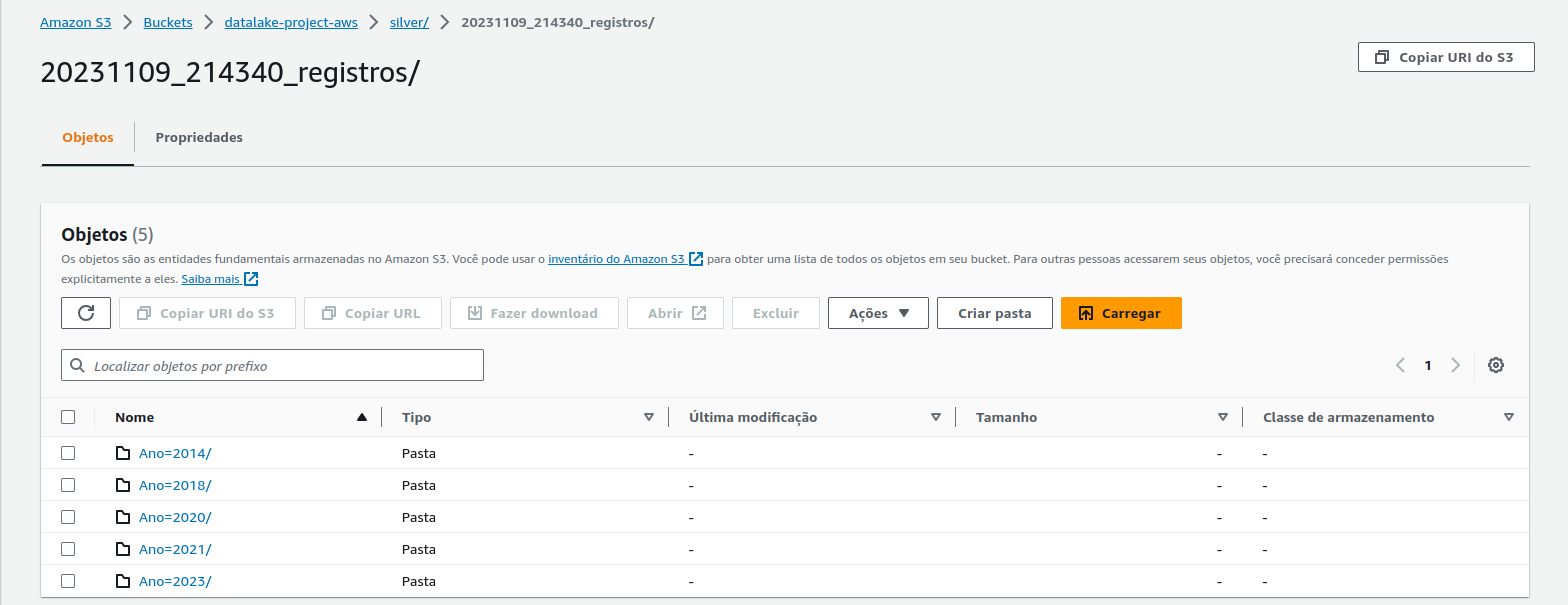

In [5]:
# Exemplo de dados na camada GOLD - pós segunda transformação do datalake
# uma partição do arquivo total - partição do ano 2020

import pandas as pd
df_gold = pd.read_parquet('gold_sample.parquet')
print(df_gold.info())
df_gold.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp_do_registro     10 non-null     datetime64[ns]
 1   turno_compra              10 non-null     object        
 2   nome                      10 non-null     object        
 3   sobrenome                 10 non-null     object        
 4   nome_completo             10 non-null     object        
 5   email                     10 non-null     object        
 6   dominio_email             10 non-null     object        
 7   telefone                  10 non-null     object        
 8   produto_adquirido         10 non-null     object        
 9   valor_da_compra           10 non-null     float32       
 10  desconto_oferecido        10 non-null     float64       
 11  valor_com_desconto        10 non-null     float64       
 12  canal                    

,timestamp_do_registro,turno_compra,nome,sobrenome,nome_completo,email,dominio_email,telefone,produto_adquirido,valor_da_compra,desconto_oferecido,valor_com_desconto,canal,plataforma_de_interacao,campanha_de_marketing,vendedor,codigo_de_desconto_usado,arquivo_de_origem
0,2020-09-15 12:40:00,Tarde,Larissa,Melo,Larissa Melo,larissa4@email.com,email.com,12965432108,Console de Videogame,2500.0,0.15,2125.0,Redes Sociais,Aplicativo Móvel,Campanha Primavera 2023,NÃO INFORMADO,PRIMAVERA23,20231110_120057_registros-rede-vendas-xpto
1,2020-09-30 14:10:00,Tarde,Leonardo,Peixoto,Leonardo Peixoto,leo7@email.com,email.com,12932109875,Cadeira Gamer,700.0,0.10,630.0,E-mail Marketing,Website,Campanha Primavera 2023,NÃO INFORMADO,PRIMAVERA23,20231110_120057_registros-rede-vendas-xpto
2,2020-10-15 14:40:00,Tarde,Isabela,Ramos,Isabela Ramos,isabela10@email.com,email.com,12909876542,Webcam,300.0,0.05,285.0,Loja Física,Loja Física,Campanha Verão 2023,Carlos,VERAO2023,20231110_120057_registros-rede-vendas-xpto
3,2020-09-10 11:30:00,Manhã,Ricardo,Batista,Ricardo Batista,ricardo3@email.com,email.com,12976543219,Jogo de Videogame,200.0,0.05,190.0,E-mail Marketing,Website,Campanha Primavera 2023,NÃO INFORMADO,PRIMAVERA23,20231110_120057_registros-rede-vendas-xpto
4,2020-09-01 09:10:00,Manhã,Roberto,Andrade,Roberto Andrade,roberto1@email.com,email.com,12987654320,Livro,50.0,0.00,50.0,Anúncio Online,Aplicativo Móvel,Campanha Primavera 2023,NÃO INFORMADO,NÃO DISPONÍVEL,20231110_120057_registros-rede-vendas-xpto
5,2020-09-05 10:20:00,Manhã,Juliana,Martins,Juliana Martins,juliana2@email.com,email.com,12998765431,Câmera,1500.0,0.10,1350.0,Loja Física,Loja Física,Campanha Primavera 2023,Roberta,PRIMAVERA23,20231110_120057_registros-rede-vendas-xpto
6,2020-09-20 13:50:00,Tarde,Renato,Carvalho,Renato Carvalho,renato5@email.com,email.com,12954321097,Blu-Ray de Filme,100.0,0.10,90.0,Loja Física,Loja Física,Campanha Primavera 2023,Renata,PRIMAVERA23,20231110_120057_registros-rede-vendas-xpto
7,2020-09-25 14:00:00,Tarde,Thais,Oliveira,Thais Oliveira,thais6@email.com,email.com,12943210986,Livro Digital,30.0,0.05,28.5,Redes Sociais,Aplicativo Móvel,Campanha Primavera 2023,NÃO INFORMADO,PRIMAVERA23,20231110_120057_registros-rede-vendas-xpto
8,2020-10-05 14:20:00,Tarde,Priscila,Lima,Priscila Lima,priscila8@email.com,email.com,12921098764,Mochila,120.0,0.05,114.0,Loja Física,Loja Física,Campanha Verão 2023,Juliana,VERAO2023,20231110_120057_registros-rede-vendas-xpto
9,2020-10-10 14:30:00,Tarde,Felipe,Castro,Felipe Castro,felipe9@email.com,email.com,12910987653,Mousepad,40.0,0.10,36.0,Redes Sociais,Website,Campanha Verão 2023,NÃO INFORMADO,VERAO2023,20231110_120057_registros-rede-vendas-xpto
